# **ĐẶT CÂU HỎI VÀ TRỰC QUAN HÓA DỮ LIỆU**

---

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('../Datasets/solar_weather_clean.csv', index_col='Time', parse_dates=True)
df.head(10)

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
Time,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,100,0,0,450,0.0,4,0,1
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,100,0,0,450,0.0,4,0,1
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,100,0,0,450,0.0,4,0,1
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,100,0,0,450,0.0,4,0,1
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,100,0,0,450,0.0,4,1,1
2017-01-01 01:15:00,0,0.0,1.7,1020,100,5.2,100,0,0,450,0.0,4,1,1
2017-01-01 01:30:00,0,0.0,1.7,1020,100,5.2,100,0,0,450,0.0,4,1,1
2017-01-01 01:45:00,0,0.0,1.7,1020,100,5.2,100,0,0,450,0.0,4,1,1
2017-01-01 02:00:00,0,0.0,1.9,1020,100,5.5,100,0,0,450,0.0,4,2,1


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu 1: Xu hướng bức xạ mặt trời (GHI) thay đổi như thế nào theo thời gian? Có sự biến động theo mùa hoặc xu hướng dài hạn không?   </b></font>
</div>

### 1.1. Xu hướng bức xạ mặt trời (GHI) theo thời gian

### a. Tiền xử lý

In [3]:
# Resample và Rolling Mean
ghi_daily = df['GHI'].resample('D').mean()  
rolling_30d = ghi_daily.rolling(window=30, center=True).mean()  
rolling_365d = ghi_daily.rolling(window=365, center=True, min_periods=183).mean()

### b. Trực quan hóa dữ liệu

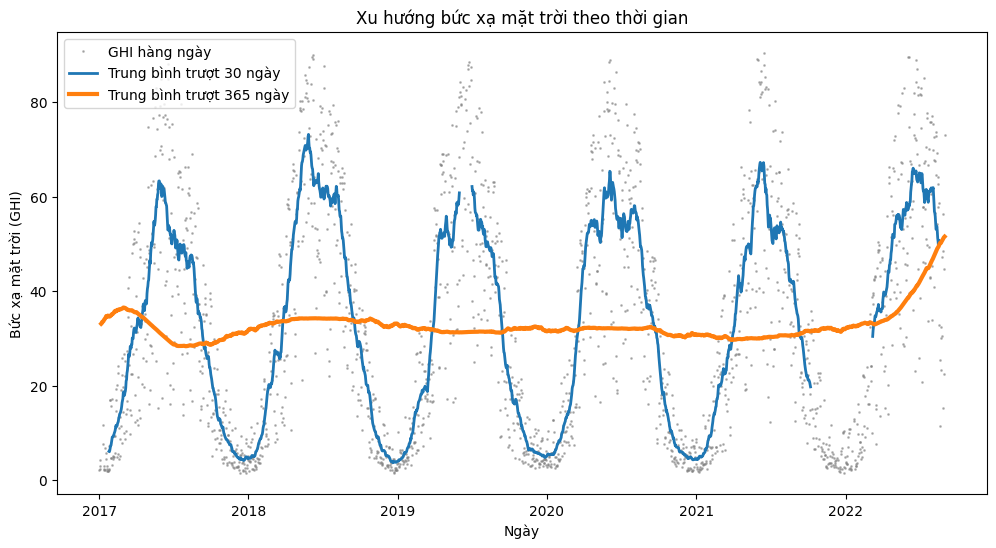

In [4]:
# Vẽ Line Plot
plt.figure(figsize=(12, 6))
plt.plot(ghi_daily, ".", markersize=2, color="gray", alpha=0.5, label="GHI hàng ngày")
plt.plot(rolling_30d, linewidth=2, label="Trung bình trượt 30 ngày")
plt.plot(rolling_365d, linewidth=3, label="Trung bình trượt 365 ngày")
plt.title("Xu hướng bức xạ mặt trời theo thời gian")
plt.xlabel("Ngày")
plt.ylabel("Bức xạ mặt trời (GHI)")
plt.legend()
plt.show()

### c. Nhận xét

- Bức xạ mặt trời có sự thay đổi rõ ràng theo chu kỳ năm, tăng mạnh vào mùa hè và giảm vào mùa đông.

- Trung bình trượt 30 ngày (đường xanh) làm nổi bật chu kỳ mùa vụ, trong khi trung bình trượt 365 ngày (đường cam) thể hiện xu hướng dài hạn, ổn định hoặc hơi tăng nhẹ.

### 1.2. Bức xạ mặt trời (GHI) trung bình theo tháng

### a. Trực quan hóa dữ liệu

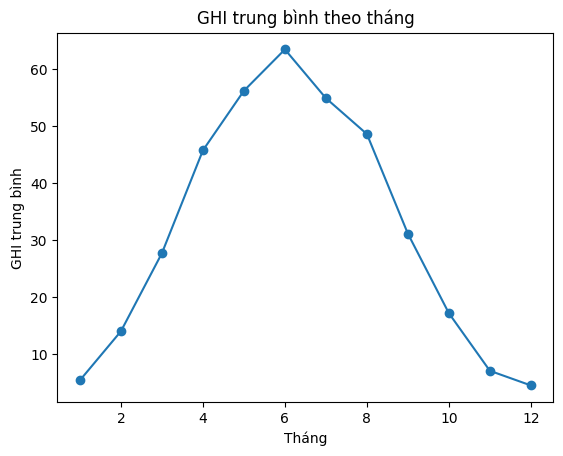

In [5]:
# Seasonal Line Plot
seasonal_trend = df.groupby(df.index.month)['GHI'].mean()
seasonal_trend.plot(kind='line', marker='o', title="GHI trung bình theo tháng")
plt.xlabel("Tháng")
plt.ylabel("GHI trung bình")
plt.show()

### b. Nhận xét

- GHI tăng dần từ tháng 1, đạt đỉnh vào tháng 6-7 (mùa hè), sau đó giảm dần vào mùa đông (tháng 11-12).

- Xu hướng này khớp với thời gian ngày dài hơn và bức xạ mặt trời cao hơn vào mùa hè.

### 1.3. Biến động GHI theo mùa

### a. Trực quan hóa dữ liệu

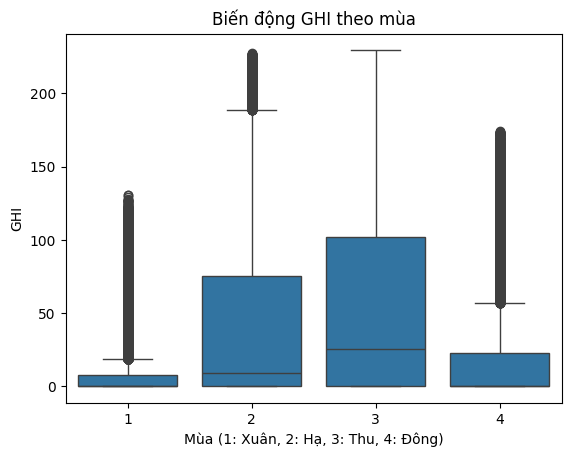

In [6]:
# Boxplot theo mùa
df['season'] = (df.index.month % 12 + 3) // 3  # Phân loại theo mùa: Xuân (1), Hạ (2), Thu (3), Đông (4)
sns.boxplot(x="season", y="GHI", data=df)
plt.title("Biến động GHI theo mùa")
plt.xlabel("Mùa (1: Xuân, 2: Hạ, 3: Thu, 4: Đông)")
plt.ylabel("GHI")
plt.show()

### b. Nhận xét

- Mùa Hè có bức xạ mặt trời cao nhất với độ biến động lớn, do sự thay đổi trong các điều kiện thời tiết (mây, mưa, trời quang).

- Mùa Đông có giá trị GHI thấp và ổn định hơn.

### 1.4. Kết luận chung

- **Xu hướng dài hạn**: Qua biểu đồ trung bình trượt 365 ngày, GHI duy trì mức ổn định tổng thể, không có xu hướng tăng hay giảm đáng kể trong nhiều năm, nhưng vẫn thể hiện các dao động ngắn hạn.

- **Biến động theo mùa**:

    - Biểu đồ trung bình theo tháng cho thấy GHI đạt đỉnh vào mùa hè (tháng 6-7) và giảm thấp nhất vào mùa đông (tháng 12-1), thể hiện rõ chu kỳ hàng năm của bức xạ mặt trời.

    - Boxplot theo mùa khẳng định bức xạ mặt trời biến thiên mạnh nhất vào mùa hè, với giá trị trung bình và dao động lớn hơn so với các mùa khác. Trong khi đó, mùa đông có mức GHI thấp nhất và ít dao động hơn.

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu 2:  Khi nào trong ngày và trong năm mức tiêu thụ năng lượng và mức bức xạ mặt trời (GHI) là cao nhất?   </b></font>
</div>

### a. Tiền xử lí

In [7]:
pivot_energy = df.pivot_table(values='Energy delta[Wh]', index='hour', columns='month', aggfunc='mean')
pivot_GHI = df.pivot_table(values='GHI', index='hour', columns='month', aggfunc='mean')

### b. Trực quan hoá dữ liệu

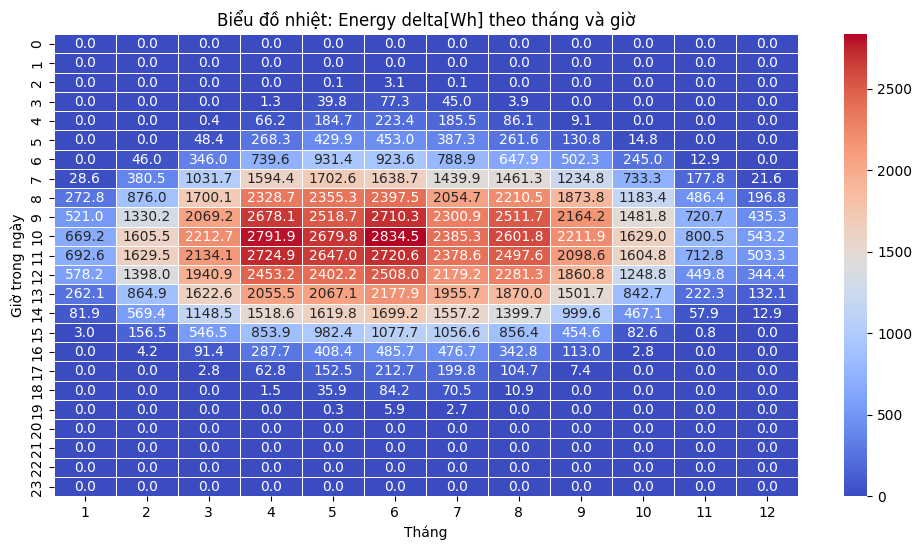

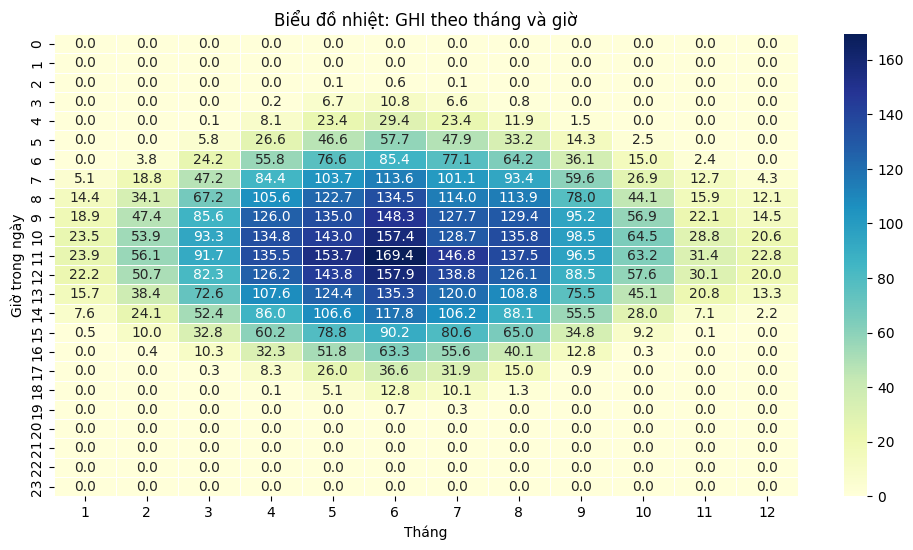

In [8]:
# Vẽ heatmap cho Energy delta[Wh]
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_energy, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Biểu đồ nhiệt: Energy delta[Wh] theo tháng và giờ')
plt.xlabel('Tháng')
plt.ylabel('Giờ trong ngày')
plt.show()

# Vẽ heatmap cho GHI
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_GHI, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Biểu đồ nhiệt: GHI theo tháng và giờ')
plt.xlabel('Tháng')
plt.ylabel('Giờ trong ngày')
plt.show()

### c. Nhận xét:

#### Biểu đồ Energy delta[Wh] (Mức tiêu thụ năng lượng)
##### Theo ngày: 
- Mức tiêu thụ năng lượng cao nhất: Dựa trên màu sắc của biểu đồ, có thể thấy rằng mức tiêu thụ năng lượng có xu hướng cao nhất vào buổi sáng và buổi chiều. Những giờ có mức tiêu thụ năng lượng cao thường là từ 6 giờ sáng đến 9 giờ sáng và từ 4 giờ chiều đến 7 giờ tối.
- Điều này có thể do nhu cầu tiêu thụ năng lượng cao hơn vào các giờ cao điểm khi mọi người bắt đầu sử dụng các thiết bị điện hoặc khi có hoạt động làm việc trong ngày.
##### Theo tháng:
- Mức tiêu thụ năng lượng cao nhất: Mức tiêu thụ năng lượng có xu hướng cao hơn vào các tháng cuối năm, đặc biệt là vào tháng 11 và tháng 12. Điều này có thể liên quan đến việc tiêu thụ năng lượng cho hệ thống sưởi ấm hoặc các thiết bị trong mùa lạnh, khi nhiệt độ ngoài trời giảm và nhu cầu sử dụng năng lượng tăng.


#### Biểu đồ GHI (Global Horizontal Irradiance - Bức xạ mặt trời)
##### Theo ngày:
- Bức xạ mặt trời cao nhất: Dựa trên biểu đồ, có thể thấy rằng bức xạ mặt trời đạt cao nhất vào giữa ngày, đặc biệt là trong khoảng thời gian từ 12 giờ trưa đến 2 giờ chiều. Đây là thời điểm mặt trời ở cao nhất, tạo ra bức xạ mặt trời mạnh nhất.
- Các giờ sáng sớm (từ 6 giờ sáng đến 9 giờ sáng) và chiều tối (từ 5 giờ chiều trở đi) có mức bức xạ thấp hơn, vì mặt trời ở vị trí thấp và không tạo ra bức xạ mạnh.
##### Theo tháng: 
- Bức xạ mặt trời cao nhất: Bức xạ mặt trời đạt mức cao nhất vào mùa hè, đặc biệt là vào các tháng 6, 7, và 8, khi ngày dài hơn và có nhiều ánh sáng mặt trời hơn.
- Các tháng mùa đông (tháng 11 đến tháng 2) có mức bức xạ mặt trời thấp hơn, do ngày ngắn và mặt trời không chiếu sáng lâu.

#### Kết luận: Mối quan hệ giữa Energy delta[Wh] và GHI
- Có thể nhận thấy mối quan hệ giữa tiêu thụ năng lượng và bức xạ mặt trời. Mức tiêu thụ năng lượng cao nhất thường xảy ra vào các giờ có mức bức xạ mặt trời thấp (ví dụ: vào sáng sớm và chiều tối). Điều này có thể chỉ ra rằng nhu cầu năng lượng không hoàn toàn phụ thuộc vào bức xạ mặt trời, mà còn bị ảnh hưởng bởi các yếu tố khác như hoạt động của con người, nhiệt độ môi trường, hoặc nhu cầu sử dụng năng lượng cho các thiết bị khác.
- Tuy nhiên, vào các giờ giữa ngày (khi bức xạ mặt trời mạnh nhất), mức tiêu thụ năng lượng vẫn không phải là cao nhất, có thể là do mọi người đang sử dụng ít năng lượng hoặc vì các hệ thống năng lượng mặt trời đang hoạt động và cung cấp năng lượng trực tiếp.

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu 3:  Có sự thay đổi nào về mức tiêu thụ năng lượng khi điều kiện thời tiết thay đổi (clear, cloudy, rainy) không?   </b></font>
</div>

### a. Tiền xử lí

In [9]:
# Kiểm tra các giá trị unique của cột 'weather_type' để đảm bảo các nhóm có tên đúng
print(df['weather_type'].unique())

# Tạo một dictionary ánh xạ các giá trị số thành các tên thời tiết (trong file datapreprocessing đã đề cập)
weather_mapping = {
    1: 'clear',    # Trời quang
    2: 'partly cloudy',   # Ít mây
    3: 'cloudy',    # Nhiều mây
    4: 'overcast', # U ám
    5: 'rainy'    # Mưa
}

df['weather_type'] = df['weather_type'].map(weather_mapping)
print(df['weather_type'].unique())

# Phân nhóm theo 'weather_type' và tính các chỉ số thống kê cho 'Energy delta[Wh]'
grouped_data = df.groupby('weather_type')['Energy delta[Wh]'].describe()
print(grouped_data)

[4 5 3 2 1]
['overcast' 'rainy' 'cloudy' 'partly cloudy' 'clear']
                 count        mean          std  min  25%   50%      75%  \
weather_type                                                               
clear          27976.0  825.724657  1343.331998  0.0  0.0   0.0  1282.25   
cloudy         31660.0  670.411118  1103.513501  0.0  0.0  18.0   884.00   
overcast       73004.0  411.460386   826.128332  0.0  0.0   0.0   379.00   
partly cloudy  35428.0  784.171729  1234.083553  0.0  0.0  10.0  1221.25   
rainy          28708.0  369.537690   728.570802  0.0  0.0  16.0   375.00   

                  max  
weather_type           
clear          4735.0  
cloudy         5020.0  
overcast       4913.0  
partly cloudy  4842.0  
rainy          4793.0  


##### Giải thích:
- Các giá trị 1, 2, 3, 4, 5 là đại diện cho các loại thời tiết khác nhau, có thể thực hiện ánh xạ từ các giá trị này sang các tên mô tả dễ hiểu hơn như clear, partly cloudy, cloudy, overcast, rainy
- groupby('weather_type'): Dữ liệu được phân nhóm theo cột weather_type.
- ['Energy delta[Wh]'].describe(): Tính toán các chỉ số thống kê mô tả (count, mean, std, min, 25%, 50%, 75%, max) cho mức tiêu thụ năng lượng (Energy delta[Wh]) trong mỗi nhóm thời tiết.
- count: Số lượng dữ liệu trong mỗi nhóm thời tiết.
- mean: Trung bình mức tiêu thụ năng lượng của từng nhóm.
- std: Độ lệch chuẩn của mức tiêu thụ năng lượng, chỉ ra sự phân tán của dữ liệu.
- min: Mức tiêu thụ năng lượng thấp nhất trong mỗi nhóm.
- 25% (Q1), 50% (median), 75% (Q3): Các phần tứ phân vị của mức tiêu thụ năng lượng.
- max: Mức tiêu thụ năng lượng cao nhất trong mỗi nhóm.

### b. Trực quan hoá dữ liệu

/tmp/ipykernel_12137/533806655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather_type', y='Energy delta[Wh]', data=df, palette="Set2")


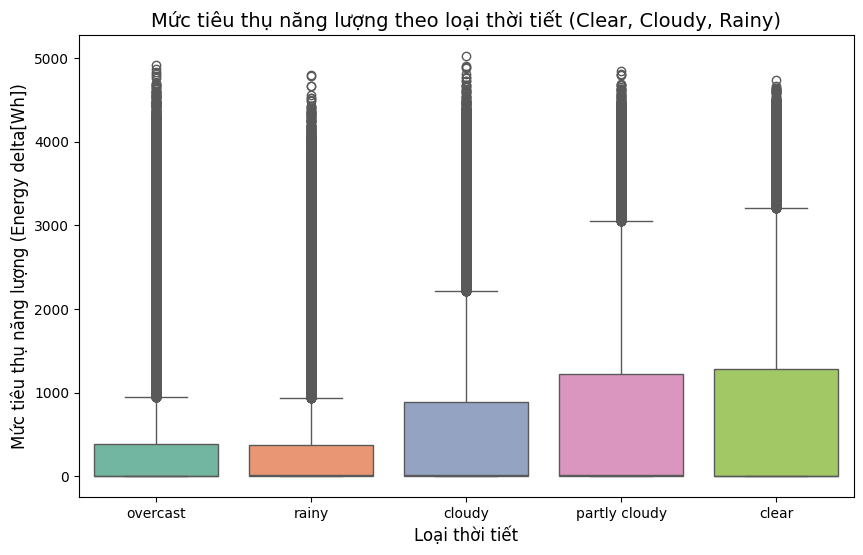

In [10]:
# Tạo biểu đồ boxplot cho mức tiêu thụ năng lượng theo từng loại thời tiết
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_type', y='Energy delta[Wh]', data=df, palette="Set2")

plt.title('Mức tiêu thụ năng lượng theo loại thời tiết (Clear, Cloudy, Rainy)', fontsize=14)
plt.xlabel('Loại thời tiết', fontsize=12)
plt.ylabel('Mức tiêu thụ năng lượng (Energy delta[Wh])', fontsize=12)
plt.show()

### c. Nhận xét: 

##### Thời tiết clear (Trời quang):
- Giá trị trung vị thấp nhất trong ba điều kiện, cho thấy mức tiêu thụ năng lượng thấp hơn khi trời trong.
- Phân bố dữ liệu có vẻ hẹp nhất, với các giá trị nằm gần trung bình, không có sự dao động lớn. Điều này có thể chỉ ra rằng trong điều kiện trời quang, mức tiêu thụ năng lượng khá ổn định và ít thay đổi.
- Các điểm ngoại lai (Outliers): Không có nhiều điểm ngoại lai xuất hiện trong nhóm "clear", điều này cho thấy hầu hết dữ liệu của nhóm này đều nằm trong phạm vi mức tiêu thụ năng lượng bình thường.
##### Thời tiết cloudy (Nhiều mây):
- Cloudy có mức trung vị cao hơn Clear nhưng thấp hơn Rainy.
- Phân bố có xu hướng rộng hơn, với giá trị nằm trải dài hơn, thể hiện sự dao động lớn hơn trong mức tiêu thụ năng lượng.
- Các điểm ngoại lai: Có một số điểm ngoại lai, có thể là do các sự kiện tiêu thụ năng lượng cao bất thường xảy ra trong những ngày nhiều mây.
##### Thời tiết rainy (Mưa):
- Có mức trung vị cao nhất, có thể chỉ ra rằng trong điều kiện mưa, mức tiêu thụ năng lượng có xu hướng tăng, có thể do hệ thống sưởi, điều hòa hoặc các yếu tố khác cần hoạt động mạnh hơn.
- Có một phạm vi phân bố rộng, với một số giá trị cực trị thấp và cao, cho thấy sự biến động mạnh mẽ trong mức tiêu thụ năng lượng khi trời mưa.
- Các điểm ngoại lai: có một số giá trị cao, cho thấy trong một số trường hợp, mức tiêu thụ năng lượng có thể đạt mức rất cao. Điều này có thể phản ánh các tình huống đặc biệt hoặc sự thay đổi trong hành vi sử dụng năng lượng trong điều kiện mưa.
#### Kết luận:
- Biểu đồ boxplot cho thấy sự khác biệt rõ rệt trong mức tiêu thụ năng lượng giữa các nhóm thời tiết (clear, cloudy, rainy).
- Thời tiết clear (trời quang) có mức tiêu thụ năng lượng ổn định và cao hơn, trong khi thời tiết cloudy và rainy có mức tiêu thụ năng lượng thấp hơn, và có sự phân tán dữ liệu lớn hơn, đặc biệt là trong điều kiện mưa.
- Điểm ngoại lai xuất hiện nhiều hơn trong nhóm "cloudy" và "rainy", điều này phản ánh sự thay đổi đột ngột hoặc những trường hợp tiêu thụ năng lượng bất thường.

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu 4: Có sự thay đổi nào trong mối quan hệ giữa nhiệt độ (temp) và độ ẩm (humidity) theo từng mùa không? Nếu có, sự thay đổi này có ảnh hưởng đến bức xạ mặt trời (GHI) không?   </b></font>
</div>

### 4.1. Mối quan hệ temp với humidity theo mùa

### a. Tiền xử lí

In [11]:
# Thêm cột mùa vào dữ liệu
df['season'] = df['month'].apply(lambda x: 'Spring' if x in [3, 4, 5] else
                                 ('Summer' if x in [6, 7, 8] else
                                  ('Fall' if x in [9, 10, 11] else 'Winter')))

### b. Trực quan hoá dữ liệu

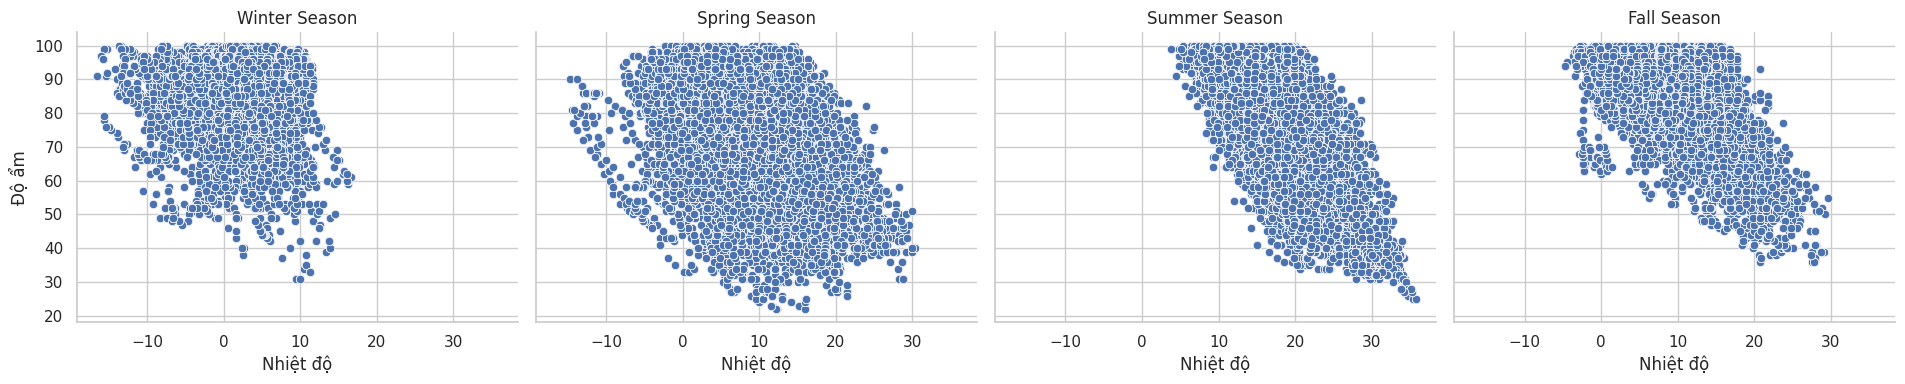

In [12]:
# Vẽ facet grid cho mối quan hệ temp vs humidity theo mùa
sns.set(style="whitegrid")
g = sns.FacetGrid(df, col="season", height=4, aspect=1.2)
g.map(sns.scatterplot, "temp", "humidity")
g.set_axis_labels("Nhiệt độ", "Độ ẩm")
g.set_titles("{col_name} Season")
plt.show()

### c. Nhận xét:

- **Mùa Đông**: Nhiệt độ thấp (đa số dưới 10°C) nhưng độ ẩm khá cao (phần lớn trên 70%). Mối quan hệ giữa nhiệt độ và độ ẩm không rõ ràng, có sự phân tán rộng.

- **Mùa Xuân**: Nhiệt độ tăng nhẹ so với mùa Đông, nhưng mối quan hệ giữa nhiệt độ và độ ẩm vẫn có xu hướng ngược chiều. Độ ẩm cao hơn khi nhiệt độ thấp, và giảm khi nhiệt độ tăng.

- **Mùa Hè**: Mối quan hệ rõ rệt hơn, với độ ẩm giảm đáng kể khi nhiệt độ tăng. Nhiệt độ cao hơn (phần lớn trên 20°C).

- **Mùa Thu**: Phân bố giống mùa Xuân, tuy nhiên biên độ dao động của nhiệt độ và độ ẩm nhỏ hơn.

### 4.2. Sự tương quan giữa Nhiệt độ, Độ ẩm và GHI theo mùa

### a. Tiền xử lí

In [13]:
# Tính hệ số tương quan giữa các đặc trưng theo mùa
seasonal_correlations = df.groupby('season')[['temp', 'humidity', 'GHI']].corr().reset_index()
seasonal_correlations_filtered = seasonal_correlations[seasonal_correlations['level_1'].isin(['temp', 'humidity', 'GHI'])]

### b. Trực quan hoá dữ liệu

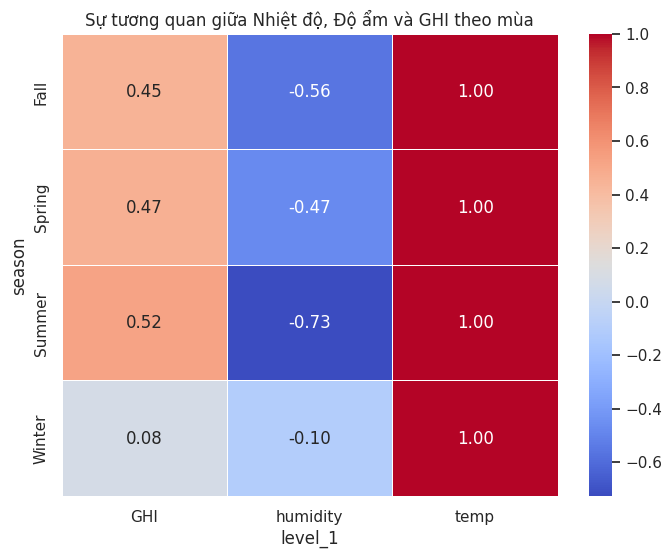

In [14]:
# Vẽ heatmap với đúng cột trong pivot
plt.figure(figsize=(8, 6))
sns.heatmap(seasonal_correlations_filtered.pivot(index='season', columns='level_1', values='temp'), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Sự tương quan giữa Nhiệt độ, Độ ẩm và GHI theo mùa")
plt.show()

### c. Nhận xét: 

- Tương quan giữa nhiệt độ và độ ẩm có sự khác biệt rõ rệt theo mùa:

    - Mùa Hè: Tương quan âm mạnh nhất (-0.73), cho thấy khi nhiệt độ tăng, độ ẩm giảm nhiều.
    
    - Mùa Đông: Tương quan yếu (-0.10), cho thấy mối quan hệ không đáng kể.
    
- Tương quan giữa nhiệt độ và GHI cao nhất vào mùa Hè (0.52) và thấp nhất vào mùa Đông (0.08). Điều này cho thấy nhiệt độ ảnh hưởng nhiều đến bức xạ mặt trời trong mùa Hè.

### 4.3. So sánh GHI trung bình theo mùa

### a. Tiền xử lí

In [15]:
# Tính toán GHI trung bình theo mùa
seasonal_GHI = df.groupby('season')['GHI'].mean().reset_index()

### b. Trực quan hoá dữ liệu

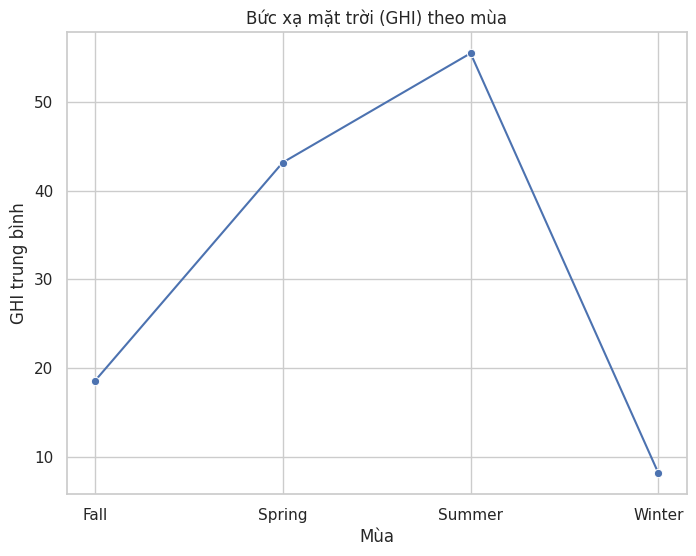

In [16]:
# Vẽ line plot so sánh GHI trung bình theo mùa
plt.figure(figsize=(8, 6))
sns.lineplot(data=seasonal_GHI, x='season', y='GHI', marker='o')
plt.title("Bức xạ mặt trời (GHI) theo mùa")
plt.xlabel("Mùa")
plt.ylabel("GHI trung bình")
plt.show()

### c. Nhận xét: 

- Mùa Hè có GHI trung bình cao nhất, cho thấy với mối quan hệ giữa nhiệt độ và bức xạ mặt trời mạnh mẽ trong mùa này.

- Mùa Đông có GHI thấp nhất, cho thấy nhiệt độ thấp không ảnh hưởng nhiều đến bức xạ mặt trời.

### 4.4. Kết luận chung

- Mối quan hệ giữa nhiệt độ và độ ẩm thay đổi rõ rệt theo mùa, đặc biệt là trong mùa Hè, khi nhiệt độ tăng sẽ dẫn đến giảm đáng kể độ ẩm.

- Sự thay đổi trong mối quan hệ này có ảnh hưởng đáng kể đến bức xạ mặt trời. Cụ thể, mùa Hè với nhiệt độ cao và độ ẩm thấp đi kèm bức xạ mặt trời (GHI) lớn nhất.

- Trong mùa Đông, dù độ ẩm cao và nhiệt độ thấp, bức xạ mặt trời hầu như không chịu ảnh hưởng đáng kể.

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu 5: Độ dài ngày (dayLength) có ảnh hưởng như thế nào đến bức xạ mặt trời (GHI)? Liệu bức xạ mặt trời có tăng theo độ dài ngày?   </b></font>
</div>

### 5.1. Mối quan hệ giữa độ dài ngày và GHI

### a. Trực quan hoá dữ liệu

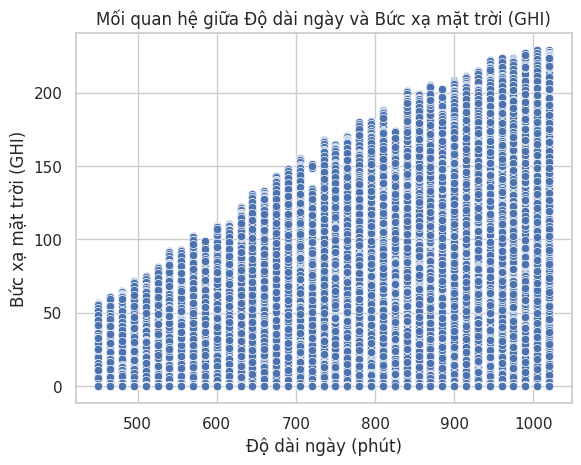

In [17]:
# Vẽ biểu dồ scatter plot thể hiện mối quan hệ giữa độ dài ngày và GHI
sns.scatterplot(x='dayLength', y='GHI', data=df)
plt.title('Mối quan hệ giữa Độ dài ngày và Bức xạ mặt trời (GHI)')
plt.xlabel('Độ dài ngày (phút)')
plt.ylabel('Bức xạ mặt trời (GHI)')
plt.show()

### b. Nhận xét

Mối quan hệ giữa độ dài ngày và bức xạ mặt trời (GHI) là tuyến tính. Khi độ dài ngày tăng lên, giá trị GHI cũng tăng dần. Điều này phản ánh rằng các ngày dài hơn có nhiều ánh sáng mặt trời hơn, dẫn đến giá trị bức xạ cao hơn.

### 5.2. Độ dài ngày theo mùa

### a. Trực quan hoá dữ liệu

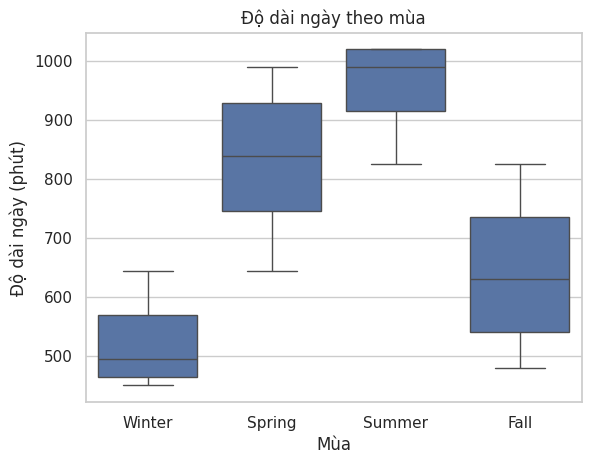

In [18]:
# Biểu đồ boxplot thể hiện độ dài ngày theo mùa
sns.boxplot(x='season', y='dayLength', data=df)
plt.title('Độ dài ngày theo mùa')
plt.xlabel('Mùa')
plt.ylabel('Độ dài ngày (phút)')
plt.show()

### b. Nhận xét

Độ dài ngày ngắn nhất vào mùa đông và dài nhất vào mùa hè. Kết hợp với biểu đồ trước, ta có thể suy luận rằng vào mùa hè (với độ dài ngày lớn), GHI cũng cao hơn.

### 5.3. Sự thay đổi bức xạ mặt trời theo độ dài ngày và thời gian trong ngày

### a. Trực quan hoá dữ liệu

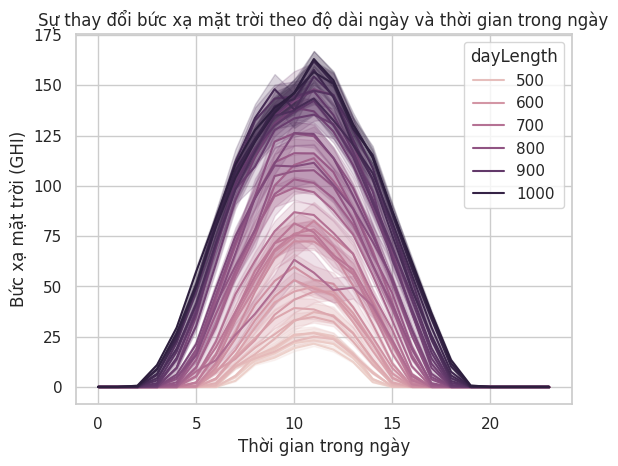

In [19]:
# Biểu đồ thể hiện mối quan hệ giữa GHI và độ dài ngày, thời gian trong ngày
sns.lineplot(x='hour', y='GHI', hue='dayLength', data=df)
plt.title('Sự thay đổi bức xạ mặt trời theo độ dài ngày và thời gian trong ngày')
plt.xlabel('Thời gian trong ngày')
plt.ylabel('Bức xạ mặt trời (GHI)')
plt.show()

### b. Nhận xét

Bức xạ mặt trời thay đổi theo thời gian trong ngày: giá trị đạt đỉnh vào giữa ngày (giờ thứ 10-15) khi mặt trời lên cao nhất. Đường cong cao hơn và rõ rệt hơn với các ngày dài hơn, thể hiện giá trị bức xạ trung bình lớn hơn. Màu sắc trong biểu đồ cũng cho thấy rằng ngày dài hơn có bức xạ mặt trời cao hơn và phân bố đều hơn trong ngày, đặc biệt vào giữa ngày.

### 5.4. Kết luận chung

- Độ dài ngày có mối quan hệ tuyến tính đến bức xạ mặt trời (GHI). Khi độ dài ngày tăng lên, lượng bức xạ mặt trời trung bình trong ngày cũng tăng.

- Vào mùa hè (khi độ dài ngày lớn nhất), bức xạ mặt trời đạt giá trị cao nhất. Ngược lại, mùa đông với độ dài ngày ngắn hơn có bức xạ mặt trời thấp hơn.

- Bức xạ mặt trời còn bị ảnh hưởng bởi thời gian trong ngày, với giá trị cực đại xuất hiện vào giữa ngày khi mặt trời ở vị trí cao nhất, bất kể độ dài ngày.